# kPCA

## Classical

In [66]:
import setup
from circuits import * 
from sklearn.datasets import load_digits
from sklearn.decomposition import KernelPCA

In [4]:
N = 100
d = 64
digits, _ = load_digits(return_X_y=True)
digits_trunc = digits[:N]

In [5]:

transformer = KernelPCA(n_components=d, kernel='linear')
X_transformed = transformer.fit_transform(digits_trunc)
X_transformed.shape

(100, 64)

<Figure size 432x288 with 0 Axes>

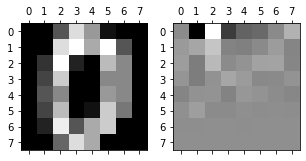

<Figure size 432x288 with 0 Axes>

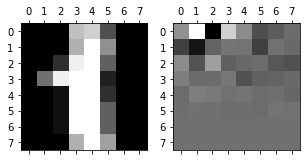

<Figure size 432x288 with 0 Axes>

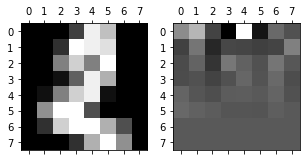

In [7]:
# Fading out for large components indicates less informative

for i in range(3):
    plt.gray()
    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5, 5))

    axes[0].matshow(digits_trunc[i].reshape(8,8))
    axes[1].matshow(X_transformed[i].reshape(8,8))

    plt.show()

In [51]:
evals, evecs = transformer.eigenvalues_, transformer.eigenvectors_

In [44]:
from sklearn.metrics.pairwise import linear_kernel
from sklearn.metrics.pairwise import pairwise_kernels

from sklearn.preprocessing import KernelCenterer

In [109]:
K = pairwise_kernels(digits_trunc)
K.shape

(100, 100)

In [ ]:
np.linalg.norm(evecs[:,4])

1.0000000000000002

In [124]:

K_transformer = KernelCenterer().fit(K)
K_transformer
K = K_transformer.transform(K)

In [203]:
evals, evecs = np.linalg.eig(K)

In [225]:
from sklearn.utils.extmath import svd_flip

# Flips evecs sign if its largest element by absolute value is negative (for uniqueness?) 
evecs, _ = svd_flip(
   evecs, np.zeros_like(evecs).T
)

In [226]:
Z = []
for n in range(len(evecs)):
    zn = np.asarray([np.sqrt(evals[i])*evecs[n][i] for i in range(d)])
    Z.append(zn)
Z = np.asarray(Z)

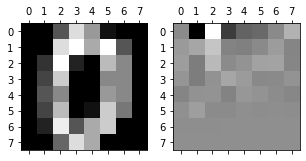

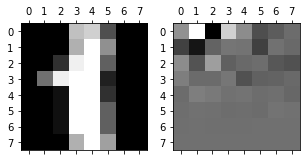

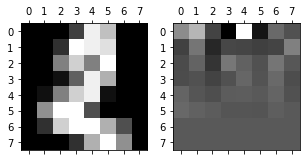

In [227]:
# Fading out for large components indicates less informative

for i in range(3):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5, 5))

    axes[0].matshow(digits_trunc[i].reshape(8,8))
    axes[1].matshow(Z[i].real.reshape(8,8))

    plt.show()

In [44]:
from sklearn.metrics.pairwise import linear_kernel
from sklearn.metrics.pairwise import pairwise_kernels

from sklearn.preprocessing import KernelCenterer

In [109]:
K = pairwise_kernels(digits_trunc)
K.shape

(100, 100)

In [ ]:
np.linalg.norm(evecs[:,4])

1.0000000000000002

In [124]:

K_transformer = KernelCenterer().fit(K)
K_transformer
K = K_transformer.transform(K)

In [203]:
evals, evecs = np.linalg.eig(K)

In [225]:
from sklearn.utils.extmath import svd_flip

# Flips evecs sign if its largest element by absolute value is negative (for uniqueness?) 
evecs, _ = svd_flip(
   evecs, np.zeros_like(evecs).T
)

In [226]:
Z = []
for n in range(len(evecs)):
    zn = np.asarray([np.sqrt(evals[i])*evecs[n][i] for i in range(d)])
    Z.append(zn)
Z = np.asarray(Z)

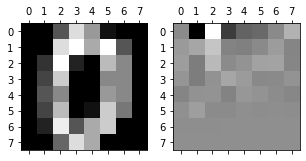

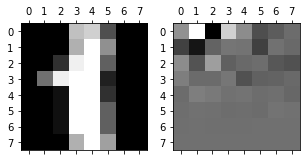

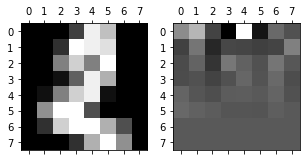

In [227]:
# Fading out for large components indicates less informative

for i in range(3):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5, 5))

    axes[0].matshow(digits_trunc[i].reshape(8,8))
    axes[1].matshow(Z[i].real.reshape(8,8))

    plt.show()

In [228]:
np.dot(Z[0],Z[1]).real

-725.6755000000012

In [223]:
K[0][1]

-725.6754999999998